In [1]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [2]:
from RobotSim373 import *

Version:  0.0.28


In [3]:
from RobotSim373.robots import *

In [61]:
class TurtleBot(Robot):
    
    def __init__(self,*args,R=0.5,x=10,y=10,angle=0,**kwargs):
        
        super().__init__(*args)
        
        robot=self
        
        R=.5
        r=R/5
        disk_center=Disk(robot,x,y,radius=R,angle=angle,name='center')

        disks=[]
        for angle in range(0,360,30):
            disk=Disk(robot,
                              x+(R+1.1*r)*cos(radians(angle)),
                              y+(R+1.1*r)*sin(radians(angle)),
                     angle=angle,radius=r,
                     name='disk %d' % angle)
            disks.append(disk)

        connect(disk_center,disks,'weld')

        robot.disks=disks
        robot.angles=list(range(0,360,30))
        robot.distances=[-1]*len(disks)

        robot.S=Storage()
        robot.next_time=-1     
        
    def read_distances(self):
        return [disk.read_distance() for disk in self.disks]
        

In [12]:
def build(robot):
    
    R=.5
    r=0.1
    disk_center=Disk(robot,10,10,radius=R,name='center')
    
    disks=[]
    for angle in range(0,360,30):
        disk=Disk(robot,
                          10+(R+1.1*r)*cos(radians(angle)),
                          10+(R+1.1*r)*sin(radians(angle)),
                 angle=angle,radius=r,
                 name='disk %d' % angle)
        disks.append(disk)
                    
    connect(disk_center,disks,'weld')

    robot.disks=disks
    robot.angles=list(range(0,360,30))
    robot.distances=[-1]*len(disks)
    
    robot.S=Storage()
    robot.next_time=-1
    
    return robot
    

def get_distances(robot):
    robot.distances=[disk.read_distance() for disk in robot.disks]
    
def act(t,robot):
#     robot['center'].τ=1
    get_distances(robot)
    
    dt=1
    if t>robot.next_time:
        robot.S+=robot.distances[:]
        robot.next_time+=dt
        
    if max(robot.distances)<12:
        robot['center'].F=0.0
        robot['center'].τ=.01
    else:

        angle=robot.angles[argmax(robot.distances)]
        if angle<180:
            robot['center'].F=0.1
            robot['center'].τ=-.01
        else:
            robot['center'].F=0.1
            robot['center'].τ=.01
            
    

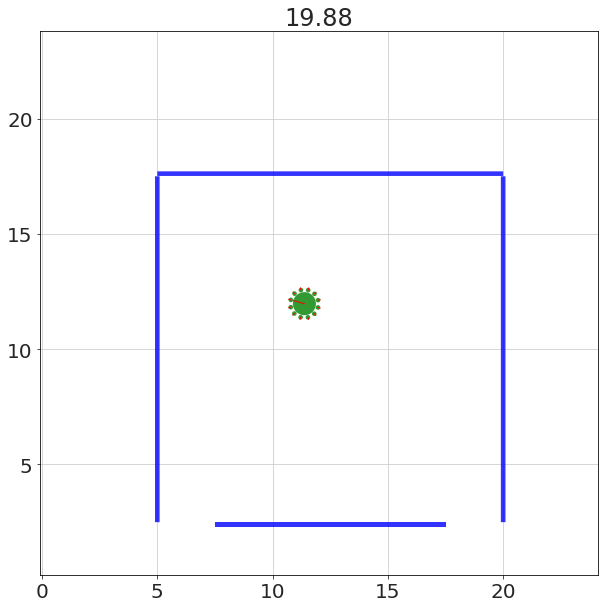

In [7]:
env=Environment(24,24)  # size of the environment
robot=Robot(env)

robot=build(robot)

Box(env,5,10,width=0.2,height=15,density=20)
Box(env,20,10,width=0.2,height=15,density=20)
Box(env,12.5,17.6,width=15,height=0.2,density=20)
Box(env,12.5,2.4,width=10,height=0.2,density=20)


run_sim(env,act,
        total_time=80,  # seconds
        dt=1/60,
        dt_display=.5,  # make this larger for a faster display
       )

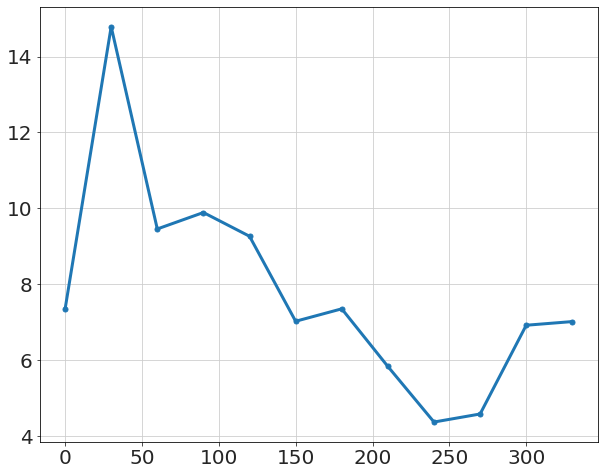

In [53]:
plot(robot.angles,robot.distances,'-o')

In [54]:
a=robot.S.arrays()

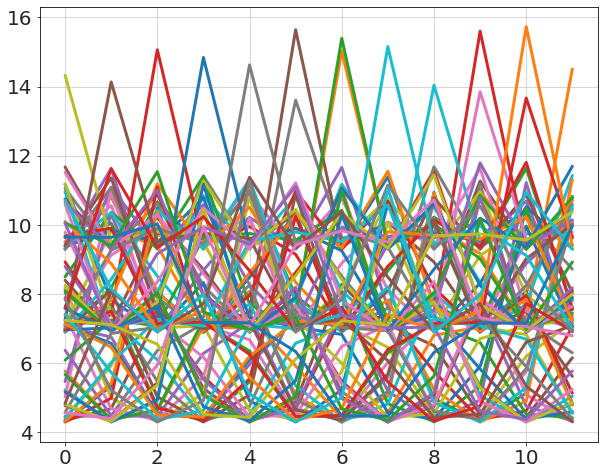

In [57]:
plot(a);

In [67]:
def act(t,robot):
    distances=robot.read_distances()
    
    dt=1
    if t>robot.next_time:
        robot.S+=distances[:]
        robot.next_time+=dt
        
    if max(robot.distances)<25:
        robot['center'].F=0.1
        robot['center'].τ=.001
    else:
        robot['center'].F=2
        robot['center'].τ=-.01


In [6]:
def randbetween(low,high):
    return rand()*(high-low)+low

<Figure size 720x720 with 0 Axes>

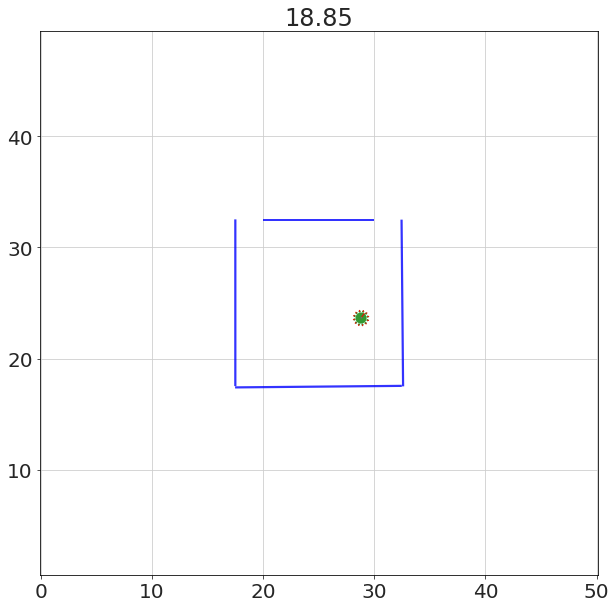

In [70]:
env=Environment(50,50)  # size of the environment
robot=TurtleBot(env,x=randbetween(20,30),y=randbetween(20,30),angle=randbetween(0,360))



Box(env,25-15/2,25,width=0.2,height=15,density=200)
Box(env,25+15/2,25,width=0.2,height=15,density=200)
Box(env,25,25-15/2,width=15,height=0.2,density=200)
Box(env,25,25+15/2,width=10,height=0.2,density=200)


run_sim(env,act,
        total_time=80,  # seconds
        dt=1/60,
        dt_display=.5,  # make this larger for a faster display
       )

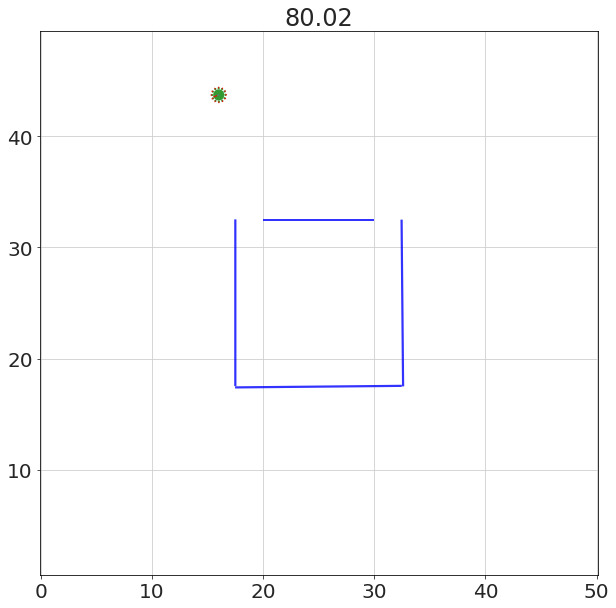

In [8]:
def randbetween(low,high):
    return rand()*(high-low)+low

def act(t,robot):
    distance=robot['center'].read_distance()
    
    if distance<5:
        robot['center'].F=-5
        robot['center'].τ=0
    elif distance<20:
        robot['center'].F=2
        robot['center'].τ=.1
    else:
        robot['center'].F=20
        robot['center'].τ=0


env=FrictionEnvironment(50,50)  # size of the environment
robot=TurtleBot(env,x=randbetween(20,30),y=randbetween(20,30),angle=randbetween(0,360))



Box(env,25-15/2,25,width=0.2,height=15,density=200)
Box(env,25+15/2,25,width=0.2,height=15,density=200)
Box(env,25,25-15/2,width=15,height=0.2,density=200)
Box(env,25,25+15/2,width=10,height=0.2,density=200)


run_sim(env,act,
        total_time=80,  # seconds
        dt=1/60,
        dt_display=.5,  # make this larger for a faster display
       )